# Linear Regression: Cost Function and Gradient Descent (from Scratch)

In this notebook, I implement Linear Regression from scratch using NumPy to understand how the Cost Function and Gradient Descent work internally.


### 🧮 Cost Function

The cost function used in Linear Regression is:

$
J(\\theta) = \\frac{1}{2m} \\sum_{i=1}^{m} \\left( h_\\theta(x^{(i)}) - y^{(i)} \\right)^2
$

Where:
- \( h_\\theta(x) = wx + b \)
- \( m \) is the number of training examples


In [1]:
import numpy as np



def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = X.dot(theta)  # h_theta(x) = X * theta
    errors = predictions - y
    squared_errors = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Added a column of 1s for theta_0 (bias)
y = np.array([2, 4, 6])
theta = np.array([0, 1])  # [theta_0, theta_1]

cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")  # Output: ~2.33 (matches manual calculation)

Cost: 2.333333333333333


## Visualize the Cost Function

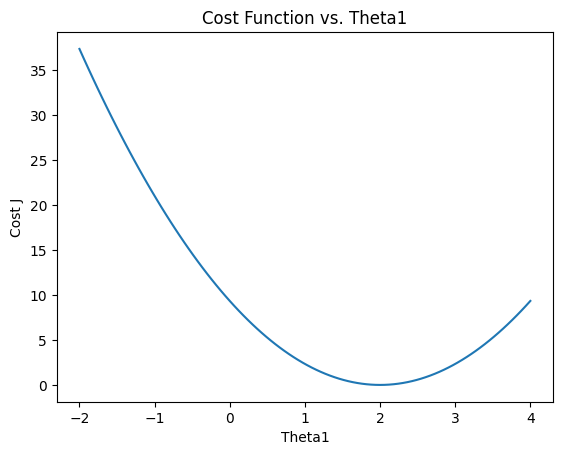

In [3]:
import matplotlib.pyplot as plt

# Range of theta values
theta1_values = np.linspace(-2, 4, 100)
costs = [compute_cost(X, y, np.array([0, t1])) for t1 in theta1_values]

# Plot
plt.plot(theta1_values, costs)
plt.xlabel('Theta1')
plt.ylabel('Cost J')
plt.title('Cost Function vs. Theta1')
plt.show()

## What is Gradient Descent?

Gradient Descent is an iterative optimization algorithm used to minimize a cost function 
J
(
θ
)
J(θ) (like MSE in linear regression). It adjusts model parameters (
θ
θ) step-by-step to find the minimum cost (optimal parameters).

# When to Use It?
Linear/Logistic Regression, Neural Networks, and most ML models.
When the cost function is differentiable (has a computable gradient).
For large datasets (stochastic variants like SGD are more efficient).

# Intution


Imagine you’re blindfolded on a hill and want to reach the bottom. You’d feel the steepest slope around you and take a step downhill. Repeat until you can’t go lower. Gradient descent does this mathematically!

# Mathematical Formulation
For a parameter 
θ
θ, the update rule is:

θ
:
=
θ
−
α
⋅
∂
J
(
θ
)
∂
θ
θ:=θ−α⋅ 
∂θ
∂J(θ)
​
 
α
α: Learning rate (step size).
∂
J
(
θ
)
∂
θ
∂θ
∂J(θ)
​
 : Gradient (slope) of 
J
J w.r.t 
θ
θ.
# Types of Gradient Descent
Batch GD: Uses the entire dataset for each step (slow but precise).
Stochastic GD (SGD): Uses one random sample per step (fast but noisy).
Mini-batch GD: Compromise (uses small batches of data).



In [13]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Sample data (with bias term)
X = np.array([[1, 1], [1, 2], [1, 3]])  # Shape: (3, 2)
y = np.array([2, 4, 6])  # Target

# Initialize parameters as floats
theta = np.array([0.0, 0.0])  # [theta_0, theta_1]

# Hyperparameters (adjusted)
alpha = 0.01  # Smaller learning rate
iterations = 1000  # More iterations

# Run gradient descent
theta_optimal, costs = gradient_descent(X, y, theta, alpha, iterations)

print(f"Optimal theta: {theta_optimal}")  # Should be closer to [0, 2]

Optimal theta: [0.22143042 1.90259238]
